<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [45]:
println("E3=60%=3/5")

E3=60%=3/5


### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I don't agree, because E1 and E2 both are still with 20% chances of getting trolls and only E3 is without trolls. So, you will still have in total 40% chance of getting Trolls while crossing the bridge.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1(TTGGG) and E2(TGGGG)

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: E1

In [47]:
println("Prior: P(B) = Troll Captured")
println("Marginal Probability: P(A) = Event1 Occurs")
println("Posterior: P(A|B) = Event1 occurs given troll captured")
println("Likelyhood: P(B|A) = Troll captured given E1 occur = 2/5")
Prior = 1/5
Likelihood = 2/5
Marginal_probability = ((2/5)*.2)+((1/5)*.2)+((0/5)*0.6)
Posterior = (Likelihood*Prior)/Marginal_probability

Prior: P(B) = Troll Captured
Marginal Probability: P(A) = Event1 Occurs
Posterior: P(A|B) = Event1 occurs given troll captured
Likelyhood: P(B|A) = Troll captured given E1 occur = 2/5


0.6666666666666666

Probability of the other event given a troll captured: E2

In [48]:
println("Prior: P(B) = Troll Captured")
println("Marginal Probability: P(A) = Event2 Occurs")
println("Posterior: P(A|B) = Event2 occurs given troll captured")
println("Likelyhood: P(B|A) = Troll captured given E1 occur = 1/5")
likelihood = (1/5)
prior = (1/5)
marginal_probability = ((2/5)*.2)+((1/5)*.2)+((0/5)*0.6)
posterior = (likelihood*prior)/marginal_probability

Prior: P(B) = Troll Captured
Marginal Probability: P(A) = Event2 Occurs
Posterior: P(A|B) = Event2 occurs given troll captured
Likelyhood: P(B|A) = Troll captured given E1 occur = 1/5


0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [49]:
1/3

0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [50]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [51]:
import Distributions as di
import Plots
import Polynomials
import Random
using Statistics
using Polynomials: Polynomial, fit, coeffs
using Plots
using Random
using Statistics

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [52]:
x = -10:10
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [53]:
y_true = x.^2 .+ 3 .*x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [54]:
d=10
noise = di.Normal(0,d)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [61]:
y_observed = y_true + rand(noise,length(x))

21-element Vector{Float64}:
  62.142492445659826
  54.02805692820427
  42.72089729025317
  35.49297199918034
  30.669870717504203
   5.208561259141666
  25.695746419217308
   9.86315510392268
  -3.748920985547847
  -0.98903859738662
 -10.368538694993962
  -0.9047165851800805
  31.417640549924958
  27.376204018015233
  26.741294988236987
  49.70103296912207
  49.72967443063551
  57.34206688727694
  74.52891372119853
 104.5926389203513
 125.81443344270873

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

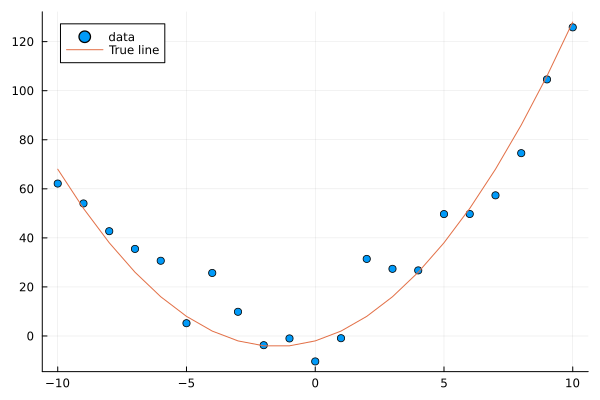

In [62]:
using Plots
using Polynomials
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")

In [63]:
line_fit = fit(x,y_observed,2)

Polynomial(5.229252546739857 + 2.5495693642782453*x + 0.8925196542154659*x^2)

In [64]:
fit_coeff = coeffs(line_fit)   

3-element Vector{Float64}:
 5.229252546739857
 2.5495693642782453
 0.8925196542154659

In [65]:
y_fitted=fit_coeff[1] .+ (fit_coeff[2].*(x)) .+ (fit_coeff[3] .*(x.^2))

21-element Vector{Float64}:
  68.98552432550399
  54.57722025968838
  41.953955502303714
  31.115730053349964
  22.062543912827156
  14.794397080735276
   9.311289557074332
   5.613221341844315
   3.7001924350452304
   3.5722028366770777
   5.229252546739857
   8.671341565233568
  13.898469892158214
  20.910637527513785
  29.707844471300294
  40.29009072351773
  52.657376284166105
  66.8097011532454
  82.74706533075563
 100.4694688166968
 119.9769116110689

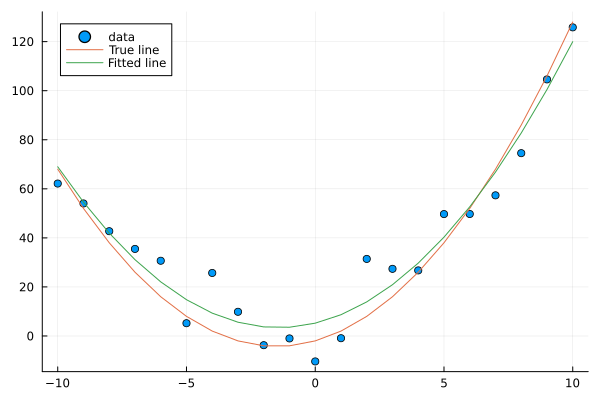

In [66]:
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted, label="Fitted line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

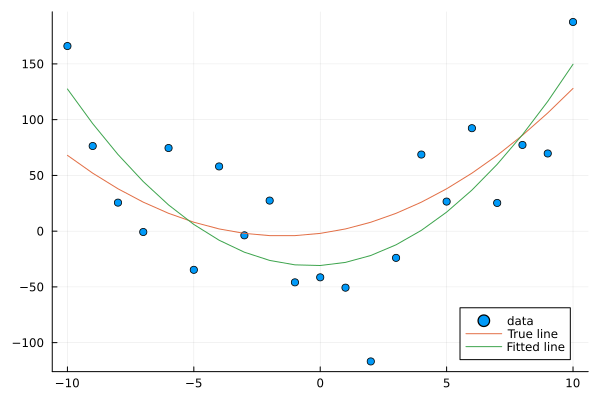

In [67]:
x2=-10:10
collect(x2)
y_true2 = x2.^2 .+ 3 .*x2 .- 2
d2=50
noise2 = di.Normal(0,d2)
y_observed2 = y_true2 + rand(noise2,length(x2))
scatter(x2,y_observed2)
plot!(x2,y_true2)
line_fit2 = fit(x2,y_observed2,2)
fit_coeff2 = coeffs(line_fit2) 
y_fitted2=fit_coeff2[1] .+ (fit_coeff2[2].*(x2)) .+ (fit_coeff2[3] .*(x2.^2))
scatter(x2,y_observed2, label="data")
plot!(x2,y_true2, label="True line")
plot!(x2,y_fitted2,label="Fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fitted line is not closer to true value that means it has large Standard Deviation noise than 2.2 graph.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


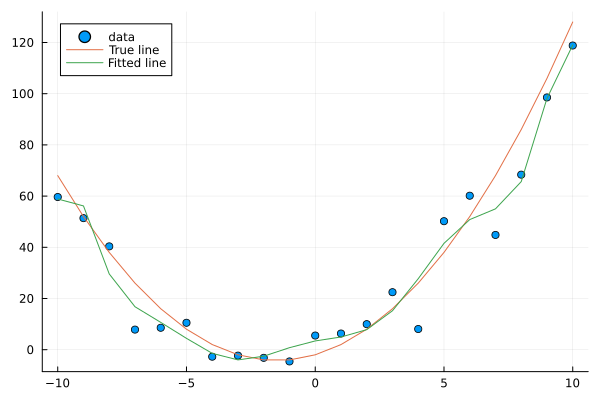

In [68]:
x3=-10:10
collect(x3)
y_true3 = x3.^2 .+ 3 .*x3 .- 2
d3 = 10
noise3 = di.Normal(0, d3)
y_observed3 = y_true3 .+ rand(noise3, length(x3))
scatter(x3, y_observed3, label = "data")
plot!(x3, y_true3, label = "True line")
poly_fit3 = fit(x3, y_observed3, 10)
y_fitted3 = poly_fit3.(x3)
plot!(x3, y_fitted3, label = "Fitted line")

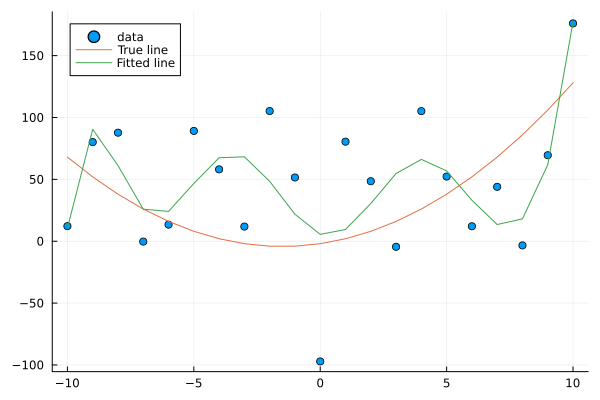

In [69]:
x3=-10:10
collect(x3)
y_true3 = x3.^2 .+ 3 .*x3 .- 2
d3 = 50
noise3 = di.Normal(0, d3)
y_observed3 = y_true3 .+ rand(noise3, length(x3))
poly_fit3 = fit(x3, y_observed3, 10)
y_fitted3 = poly_fit3.(x3)
scatter(x3, y_observed3, label = "data")
plot!(x3, y_true3, label = "True line")
plot!(x3, y_fitted3, label = "Fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


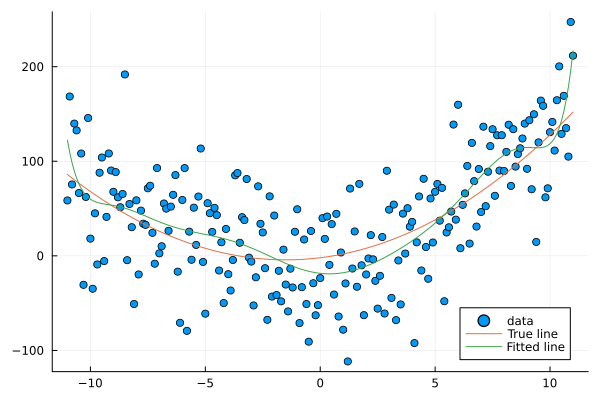

In [70]:
x_fit=-11:0.1:11
collect(x_fit)
y_true=x_fit.^2 .+ 3 .* x_fit .- 2
d=10
noise = di.Normal(0,d)
y_observed=y_true .+ rand(noise3,length(x_fit));
poly_fit= fit(x_fit,y_observed,10)
y_fitted= poly_fit.(x_fit) 
scatter(x_fit,y_observed, label="data")
plot!(x_fit,y_true, label="True line")
plot!(x_fit,y_fitted, label="Fitted line")

3. What do you observe in the plot? What is this phenomenon called?

y_observed is more scattered than previouse plot, that makes it more complex. This polynomial leads to "overfitting".